# Lahman’s Baseball Database

This database contains pitching, hitting, and fielding statistics for
Major League Baseball from 1871 through 2016.  It includes data from
the two current leagues (American and National), the four other "major" 
leagues (American Association, Union Association, Players League, and
Federal League), and the National Association of 1871-1875. 

In [1]:
# Importing the required Python libraries.
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

In [2]:
# Storing csv files in pandas data frame.
master = pd.read_csv("./baseballdatabank-2017.1/core/Master.csv")
batting = pd.read_csv("./baseballdatabank-2017.1/core/Batting.csv")
pitching = pd.read_csv("./baseballdatabank-2017.1/core/Pitching.csv")
fielding = pd.read_csv("./baseballdatabank-2017.1/core/Fielding.csv")
salaries = pd.read_csv("./baseballdatabank-2017.1/core/Salaries.csv")
schools = pd.read_csv("./baseballdatabank-2017.1/core/Schools.csv")
colleges = pd.read_csv("./baseballdatabank-2017.1/core/CollegePlaying.csv")

#### Analysis of master table.

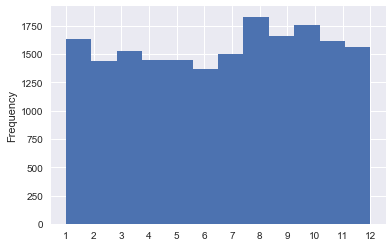

In [3]:
# Histogram plot of players birthmonth.
master.birthMonth.plot(kind='hist',bins=12,xticks=range(1,13))

Checking if the birth month of player has any impact on players selection process in the early years.If seems there is little or no birth month advantage.

In [4]:
# Extracting important variables from master table
master = master[['playerID','birthYear','birthState','birthCity','deathState','deathCity',\
                 'nameGiven','weight','height','bats','throws','finalGame']]

* PlayesID associates player with his personal details like name,date of birth,deathdate etc.So,PlayerID is important field.
* Histogram plot of birthMonth among different players shows a near uniform distribution along different months.So,birthMonth might not provide any additional information regarding the performance of the player.Same can be said about birthDay.
* birthCountry of most of the player is united states.So,This fields does not provide additional information.

In [5]:
# Checking for null values in master table.
print ("Number of players whose birthYear is not recorded : {}".format(master.birthYear.isnull().value_counts()[1]))
print ("Number of players whose birthState is not recorded : {}".format(master.birthState.isnull().value_counts()[1]))
print ("Number of players whose birthCity is not recorded : {}".format(master.birthCity.isnull().value_counts()[1]))
print ("Number of players whose nameGiven is not recorded : {}".format(master.nameGiven.isnull().value_counts()[1]))

Number of players whose birthYear is not recorded : 132
Number of players whose birthState is not recorded : 571
Number of players whose birthCity is not recorded : 180
Number of players whose nameGiven is not recorded : 37


In [6]:
# Replacing current players final date with current date.
date_object = datetime.now()
formatted_date = date_object.strftime('%Y-%m-%d')
master.finalGame.fillna(formatted_date,inplace=True)

In [7]:
# Lot of the records are having missing values in some feilds. These values  are facts. More detailed analysis of fields and data outside 
# of our current dataset is required to fill in these missing values.So, to avoid incorrect analysis ,records with incomplete data 
# dropped.
def process_data(df):
    """
    Takes in pandas dataframe.Removes records with null values.
    Removes duplicates and returns the cleaned dataset.
    """
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    return df

In [8]:
# dropping the null values.
master = process_data(master)
batting = process_data(batting)
pitching = process_data(pitching)

##### Analysis of Batting stats of players.

###### Is there a positive corellation between highest runs and number of matches? Or is there a corellation between number of runs and number of years players play?

Correlation between total runs and total number of games playerd : 0.9339


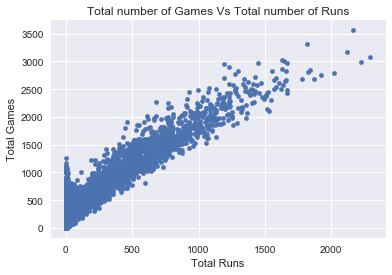

In [45]:
# Number of runs vs years.

# Calculating the total runs scored by each player and total games played by player.
player_total_runs = batting[['playerID','R','G']].groupby(by='playerID',as_index = False).sum()

# Calculating the correlation between total runs and total games.
runs_games_corr = player_total_runs.R.corr(player_total_runs.G)
print("Correlation between total runs and total number of games playerd : {:.4f}".format(runs_games_corr))

# Plot between total runs and total games.
plt = player_total_runs.plot(x='R',y='G',style='o',kind='scatter',title='Total number of Games Vs Total number of Runs')
plt.set_xlabel('Total Runs')
plt.set_ylabel('Total Games')

Correlation between no years palyed and no of runs : 0.6332


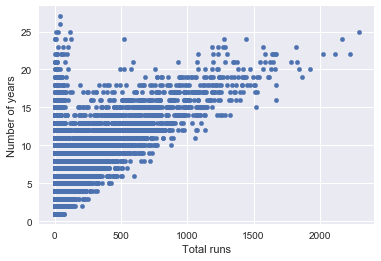

In [47]:
# Number of runs with games.

# counting no of years player played.
player_years = batting[['playerID','yearID']].groupby(by='playerID').yearID.nunique()

# mering player total years and total runs.
player_runs_years = player_total_runs.join(player_years,on = 'playerID',how='inner')

# Correlation between runs and no of years.
runs_years_corr = player_runs_years.R.corr(player_runs_years.yearID)
print("Correlation between no years palyed and no of runs : {:.4f}".format(runs_years_corr))

# plotting the total runs vs total years.
plt2 = player_runs_years.plot(x='R', y='yearID', style='o', kind='scatter')
plt2.set_xlabel('Total runs')
plt2.set_ylabel('Number of years')

As we can see in the above two plots, there is a strong correlation between the number of games played and total runs.But there is no strong correlation between the number of years played and total runs scored.
This indicates that some players played fewer games even though they have played for more span of time.

Correlation between number of years and number of games :0.8248


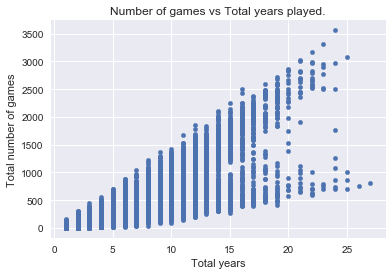

In [57]:
# Relation between number of games and total years played.

# Correlation between years and games.
years_games_corr = player_runs_years.yearID.corr(player_runs_years.G)
print ("Correlation between number of years and number of games :{:.4f}".format(years_games_corr))

# plot between years and games.
plt3 = player_runs_years.plot(x='yearID',y='G',style='o', kind='scatter', title= "Number of games vs Total years played.")
plt3.set_xlabel('Total years')
plt3.set_ylabel('Total number of games')

We can see that correlation Total years played and total number of games is strong but not as strong as correlation between correlation between number of runs and total games.

### Is there any correlation between performance of the player and salary of the player for particular year or next year?

There are two important fields where a player can contribute maximum to a team.Those are batting and pitching. Salary of the player depends on the value player contributes in winning the team for a particular season. Let's analyze batting and pitching metrics of different players and compare their salaries based on these metrics.

#### Batting

Batting provides runs to the team.More runs a player makes, more are the chances for the team to win. So, offensive batting play of the player is given more importance. Two important sabermetric parameters for measuring players performance are OPS and wRC+.  Even though wRC+ provides more insight into players performance, its measure is limited to one particular season.As we want to measure the performance of players across all eras OPS is the perfect metric.


OPS stands for On-base Plus Slugging. It's the sum of a player’s on-base percentage and their slugging percentage.

**Formulas**
$$ OPS = OBP + SLG $$
$$ OBP = (H + BB + HBP) / (AB + BB + HBP + SF) $$
$$ SLG = (1B + 2*2B + 3*3B + 4*HR) / AB $$

In general, OPS captures a player’s ability to get on base and their ability to hit for extra bases. For the most part, those two factors capture more of what hitters are trying to do. Generally speaking, if you sort hitters by OPS, you are sorting them based on their production to date with some minor exceptions.

OPS can determine how well a hitter has performed over a given period of time. The key to using OPS is understanding the current offensive climate. A .900 OPS is much more impressive in 2015 than it was in 2000. These days, league average is about .710 or so, with the best hitters around 1.000.

In [10]:
# Columns in batting table.
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

 **__Batting Table__**

| code | Name
| --- | ---
| playerID | Player ID code
| yearID | Year
| stint | player's stint (order of appearances within a season)
| teamID | Team
| lgID | League
| G | Games
| AB | At Bats
| R | Runs
| H | Hits
| 2B | Doubles
| 3B | Triples
| HR | Homeruns
| RBI | Runs Batted In
| SB | Stolen Bases
| CS | Caught Stealing
| BB | Base on Balls
| SO | Strikeouts
| IBB | Intentional walks
| HBP | Hit by pitch
| SH | Sacrifice hits
| SF | Sacrifice flies
| GIDP | Grounded into double plays

In [11]:
# Deep copying the dataframe.
batting_ops = batting.copy()
# calculate OBP
batting_ops['OBP'] = (batting_ops['H']+batting_ops['BB']+batting_ops['HBP']).div((batting_ops['AB']+batting_ops['BB']+batting_ops['HBP']+batting_ops['SF']))
batting_ops['OBP'].dropna(inplace=True)
# calcualting SLG
# H = 1B+2B+3B+HR
batting_ops['1B'] = (batting_ops['H'] - (batting_ops['2B']+batting_ops['3B']+batting_ops['HR']))
batting_ops['SLG'] = (batting_ops['H']+batting_ops['2B']+batting_ops['3B']*2+batting_ops['HR']*3).div(batting_ops['AB'])
batting_ops['OPS'] = batting_ops['OBP']+batting_ops['SLG']

# Few of OPS values containing nulls.
batting_ops[['playerID','yearID','OPS','AB']].sort_values('OPS').tail()

,playerID,yearID,OPS,AB
102802,ynoami01,2016,NaN,0
102807,youngma03,2016,NaN,0
102809,zieglbr01,2016,NaN,0
102810,zieglbr01,2016,NaN,0
102815,zychto01,2016,NaN,0


In [12]:
def values_counts(x):
    return x.value_counts()
batting.isnull().apply(values_counts).transpose()

,False
playerID,66175
yearID,66175
stint,66175
teamID,66175
lgID,66175
G,66175
AB,66175
R,66175
H,66175
2B,66175


We can see there are few varialbes which are used in the OPS calucualtion contains null values i.e 'HBP' and 'SF'.These will create null values in OPS varialbe too and also while merging with salaries table.

In [13]:
batting_ops.dropna(inplace=True)
print("Minimum values of OPS : {}".format(batting_ops.OPS.min()))
print("Maximum values of OPS : {}".format(batting_ops.OPS.max()))
print("Mean values of OPS : {}".format(batting_ops.OPS.mean()))
print("Mean values of At Bats for a player : {}".format(batting_ops.AB.mean()))

batting_ops[['playerID','yearID','OPS','AB']].sort_values('OPS').tail(10)

Minimum values of OPS : 0.0
Maximum values of OPS : 5.0
Mean values of OPS : 0.5519945914670831
Mean values of At Bats for a player : 166.84498700080147


,playerID,yearID,OPS,AB
39666,lindsch02,1958,4.0,1
66023,perrypa02,1988,5.0,1
93074,chacigu01,2010,5.0,1
87023,rogered01,2005,5.0,1
39860,sleatlo01,1958,5.0,1
61940,quirkja01,1984,5.0,1
78763,motagu01,1999,5.0,1
90632,hernafe02,2008,5.0,1
80618,yanes01,2000,5.0,1
43185,narumbu01,1963,5.0,1


OPS of 5 is very high value, When checked AB(at bats) varialbe we can see that very high ops players batted very less time.So,keeping a cut off 20(mean is 166) for players will remove this uncessary high OPS values.

In [14]:
batting_ops = batting_ops[batting_ops['AB']>20]

In [15]:
# Merging salaries and batting dataframe based on playerID and yeadID.
salary_OPS_merge = salaries.merge(batting_ops[['playerID','yearID','OPS','AB']],how='inner',on=['playerID','yearID'])
# Dropping Null values from salary_OPS_merge dataframe.
salary_OPS_merge.dropna(inplace=True)

In [16]:
# salary_OPS_merge.groupby('playerID').mean()[['salary','OPS','AB']].sort_values('OPS')

###### Analysing salary against OPS

Correlation between salary and OPS is : 0.1338106288103075


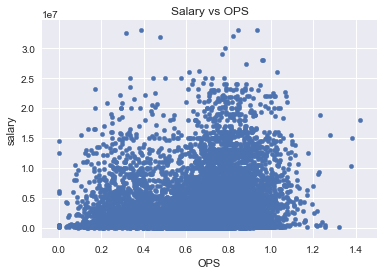

In [17]:
# understand the pitching performance stastics.
# get picthing staticstics measure.
# measure it.
# Plot your ananlysis of the first question and discuss about it.
def corr_x(x):
    return x.OPS.corr(x.salary)
print("Correlation between salary and OPS is : {}".format(corr_x(salary_OPS_merge)))
salary_OPS_merge.plot(x='OPS',y='salary',kind = 'scatter',title='Salary vs OPS')

In [18]:
salary_OPS_merge.groupby(pd.qcut(salary_OPS_merge.yearID,5)).apply(corr_x)

yearID
[1985, 1992]    0.121273
(1992, 1998]    0.232429
(1998, 2004]    0.222596
(2004, 2010]    0.159602
(2010, 2016]    0.122108
dtype: float64

In [19]:
# Getting the salary differece for top 10 percent OPS players.

In [20]:
pitching.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [21]:
# Calcualting FIP
# FIP = ((13 x Home Runs) + (3 x Walks) – (2 x Strikeouts)) / (Innings Pitched))
pitching['FIP']=(pitching['HR']*13+(pitching['BB']+pitching['HBP']*3-pitching['SO']*2)).div(pitching['IPouts']/3)

In [22]:
# merging pitching and salaries table.
salaries_pitching_merge = salaries.merge(pitching[['playerID','yearID','FIP','IPouts']],how='inner',on=['playerID','yearID'])

In [23]:
salaries_pitching_merge[salaries_pitching_merge['IPouts']>50].sort_values('FIP')

,yearID,teamID,lgID,playerID,salary,FIP,IPouts
12096,2014,CIN,NL,chapmar01,5000000,-3.129630,162
13179,2016,NYY,AL,chapmar01,9468443,-3.075000,80
11145,2012,ATL,NL,kimbrcr01,590000,-2.760638,188
7461,2003,LAN,NL,gagneer01,550000,-2.659919,247
12165,2014,KCA,AL,daviswa01,4800000,-2.583333,216
10344,2010,CHN,NL,marmoca01,2125000,-2.407725,233
5525,1999,BAL,AL,ryanbj01,200000,-2.400000,55
6666,2001,MON,NL,urbinug01,4200000,-2.400000,60
12054,2014,BOS,AL,millean01,1900000,-2.400000,60
13142,2016,MIL,NL,smithwi04,1475000,-2.345455,55


In [24]:
salaries_pitching_merge.replace([np.inf, -np.inf], np.nan,inplace=True)

In [25]:
salaries_pitching_merge.IPouts.mean()

250.93885188234412